# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

# TASK #2: IMPORT LIBRARIES AND DATASET

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [32]:
# read the csv file 
adm = pd.read_csv('/content/Admission_Predict.csv')

In [33]:
adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
# Let's drop the serial no.
adm.drop('Serial No.',axis=1,inplace=True)

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [35]:
# checking the null values
adm.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [36]:
# Check the dataframe information
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [37]:
# Statistical summary of the dataframe
adm.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [38]:
# Grouping by University ranking 
uni = adm.groupby(by='University Rating').mean()
uni

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK #4: PERFORM DATA VISUALIZATION

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

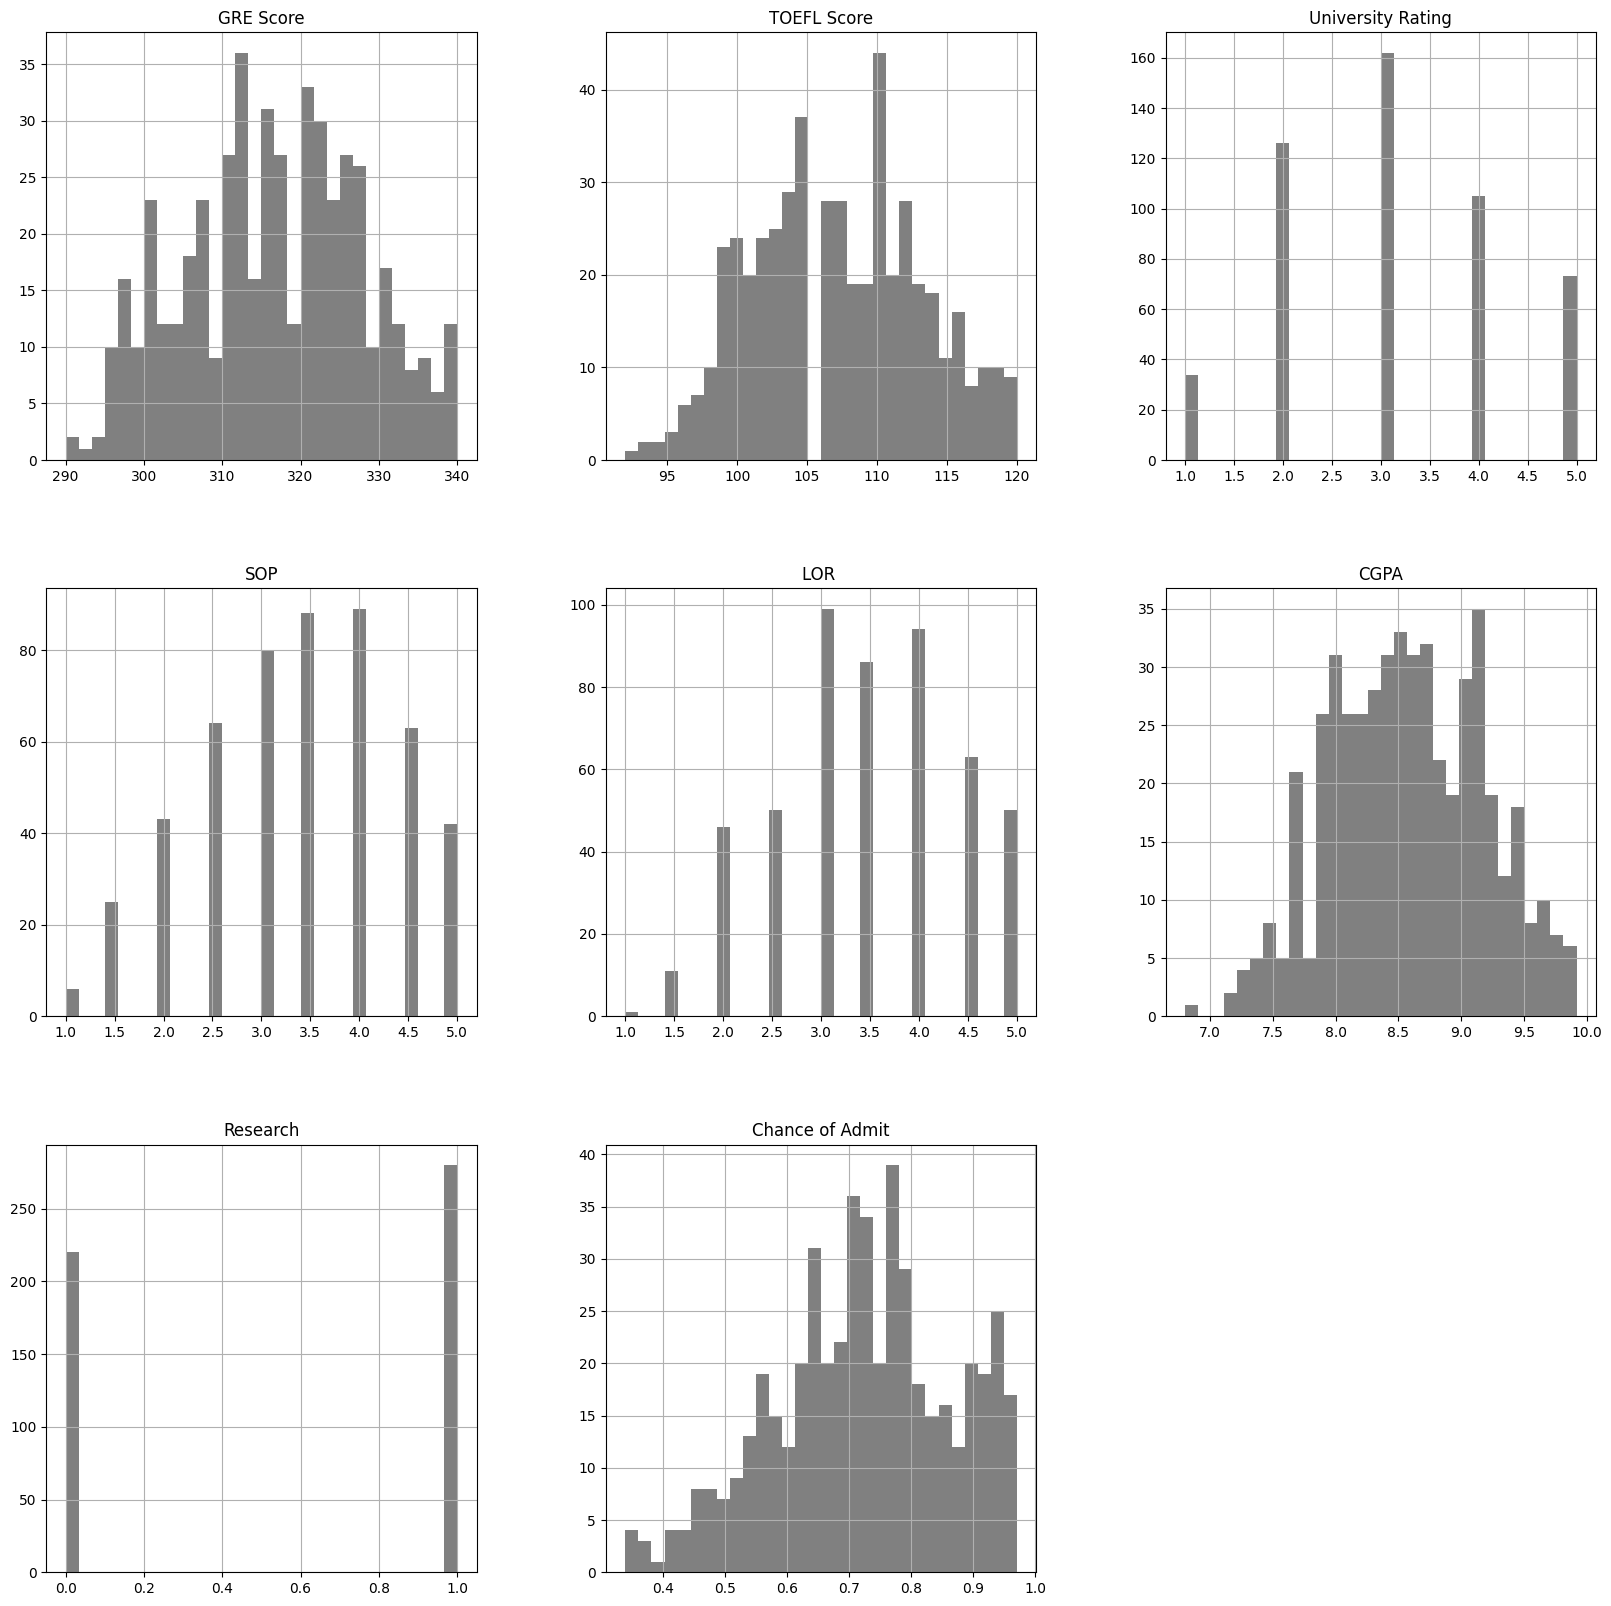

In [39]:
adm.hist(bins=30,figsize=(20,20),color='grey')

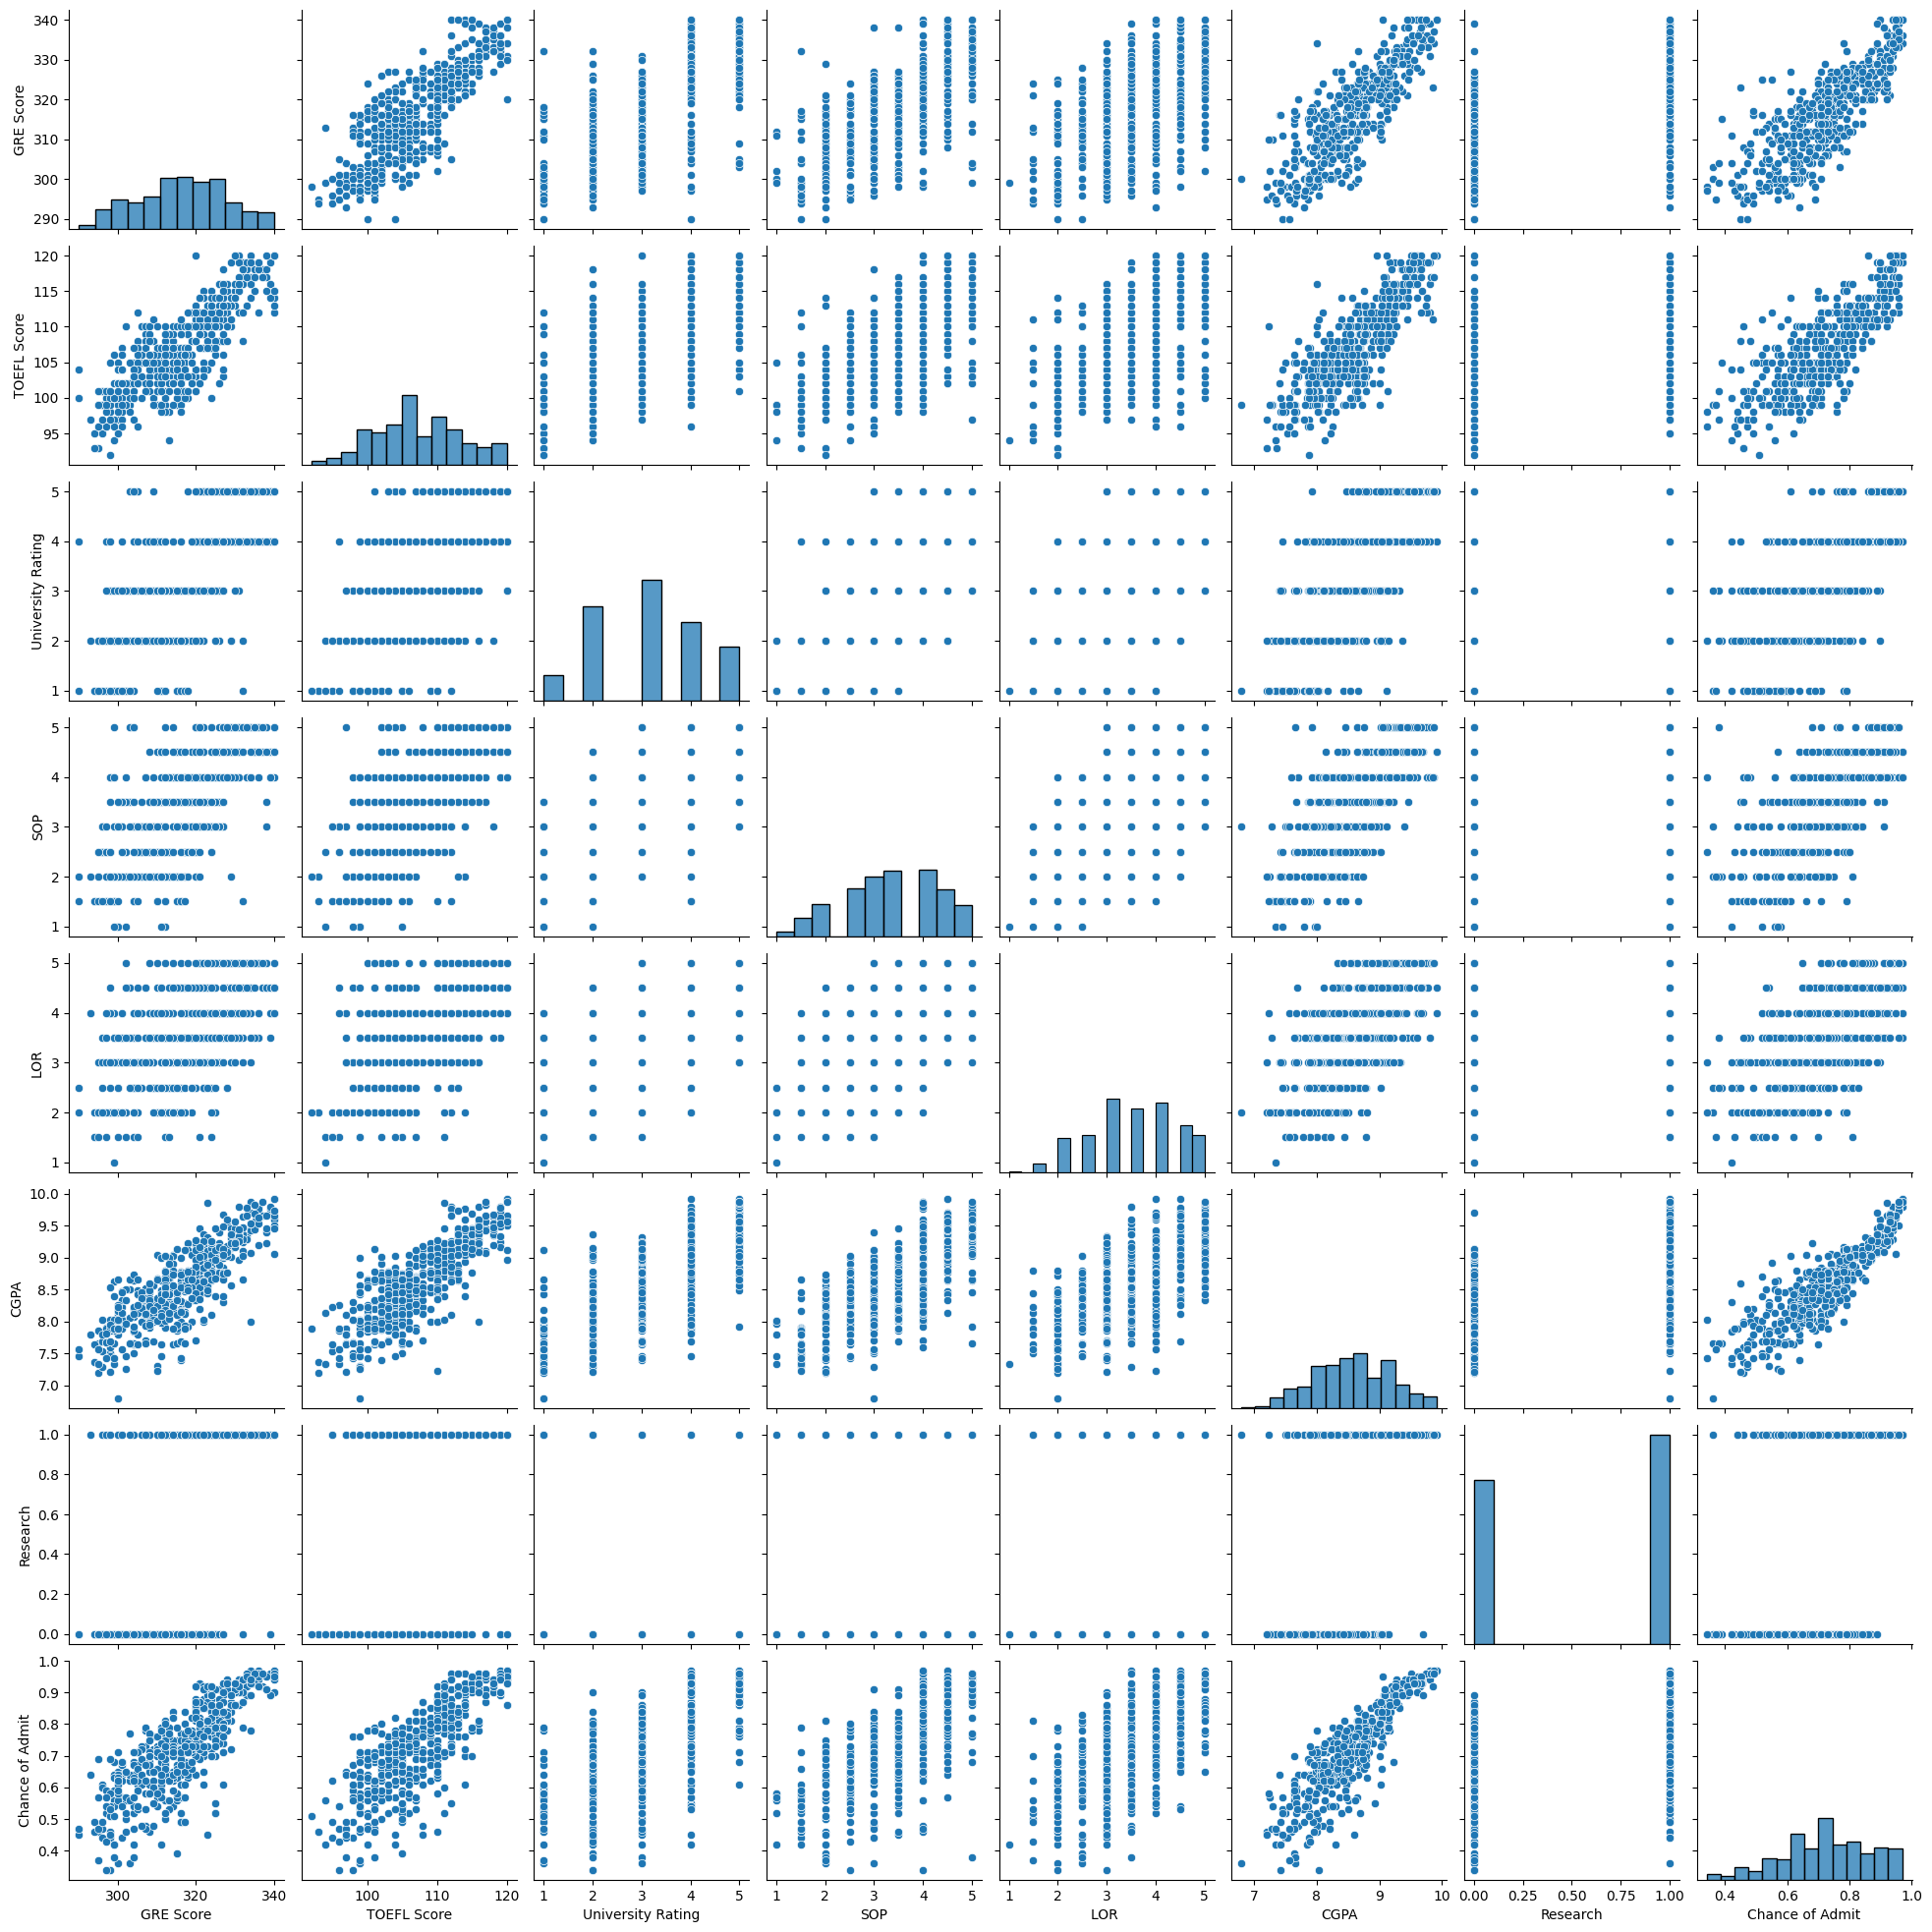

In [40]:
sns.pairplot(adm)

<Axes: >

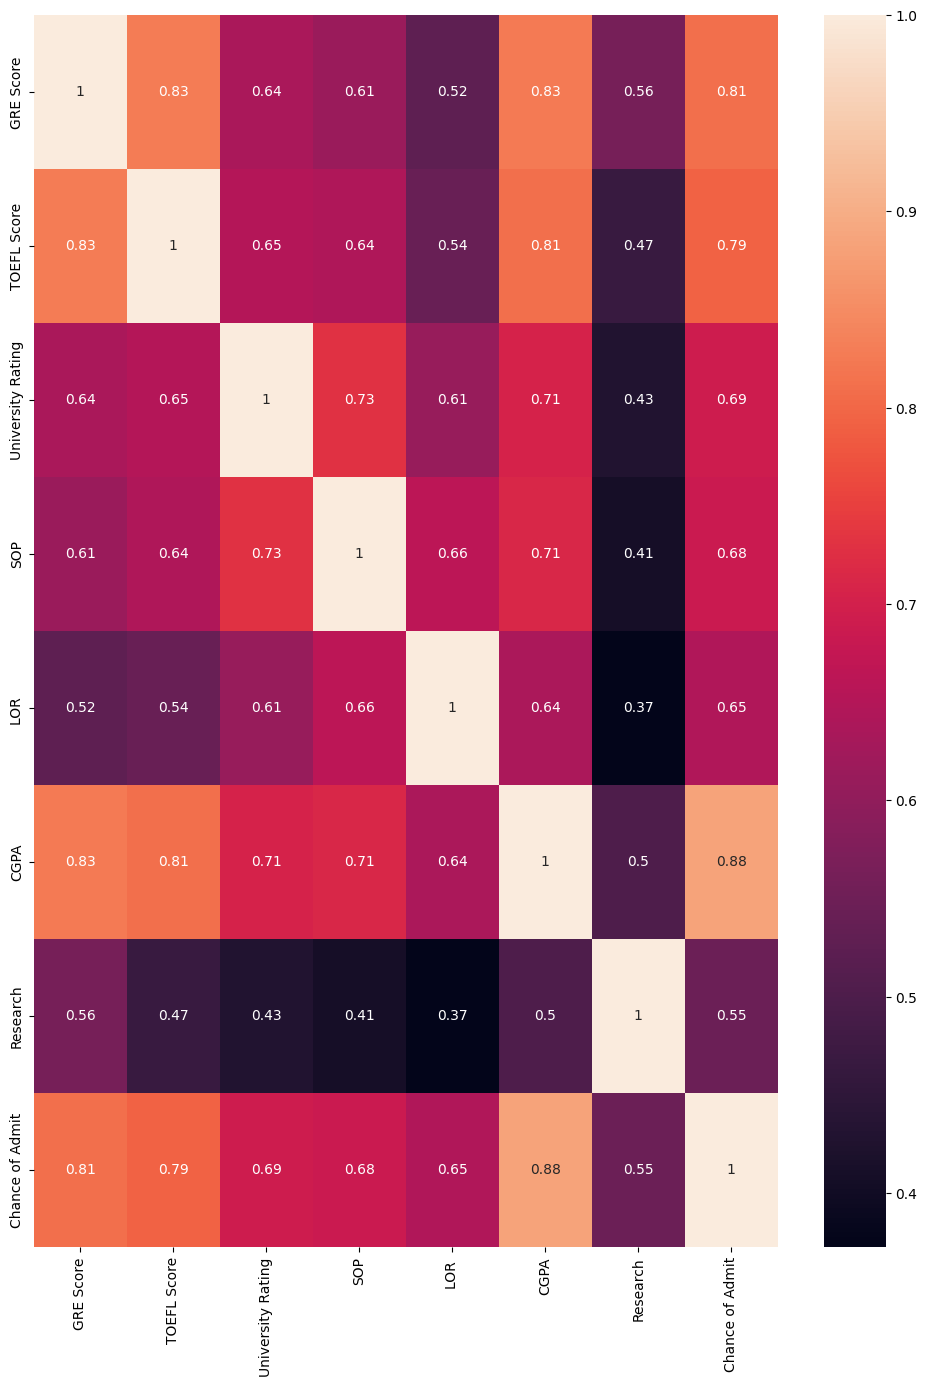

In [41]:
corr = adm.corr()
plt.figure(figsize=(12,16))
sns.heatmap(corr,annot=True)

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [42]:
adm.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [43]:
X = adm.drop('Chance of Admit',axis=1)
y = adm['Chance of Admit']

In [44]:
X.shape,y.shape

((500, 7), (500,))

In [45]:
X = np.array(X)
y = np.array(y)

In [46]:
y=y.reshape(-1,1)

In [47]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
scaler = StandardScaler()
y = scaler.fit_transform(y)

In [49]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [51]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
acc = model.score(X_test,y_test)
acc*100

73.19781216745291

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [54]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                400       
                                                                 
 activation_4 (Activation)   (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 activation_6 (Activation)   (None, 150)              

In [55]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [56]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 2s 29ms/step - loss: 0.5612 - val_loss: 0.1727
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3686 - val_loss: 0.2302
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3159 - val_loss: 0.1447
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 0.3018 - val_loss: 0.1835
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2767 - val_loss: 0.1450
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2832 - val_loss: 0.1728
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2478 - val_loss: 0.2084
Epoch 8/100
17/17 [==============================] - 0s 9ms/step - loss: 0.2376 - val_loss: 0.1728
Epoch 9/100
17/17 [==============================] - 0s 9ms/step - loss: 0.2439 - val_loss: 0.1802
Epoch 10/100
17/17 [==============================] - 0s 10ms/step - loss: 0.2271 - val_loss: 0.1971
Epoch 1

In [57]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 8ms/step - loss: 0.3162
Accuracy : 0.6837695837020874


In [58]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

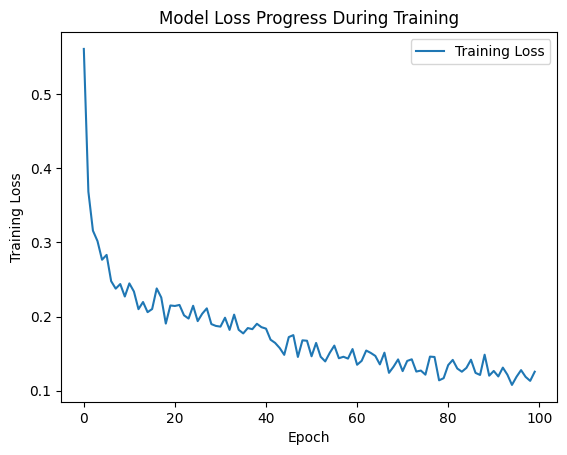

In [59]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [60]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train,y_train)

In [62]:
acc2 = tree.score(X_test,y_test)
acc2

0.45192865675034877

In [64]:
from keras.api._v2.keras import estimator
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_depth=10).fit(X_train,y_train)

<ipython-input-64-4c5b035d839e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg = RandomForestRegressor(n_estimators=100,max_depth=10).fit(X_train,y_train)


In [65]:
acc3 = reg.score(X_test,y_test)
acc3

0.6871405148706529

# TASK #9: UNDERSTAND VARIOUS REGRESSION KPIs

# TASK #10: CALCULATE REGRESSION MODEL KPIs

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 
